In [5]:
import numpy as np
import matplotlib.pyplot as plt
from graphstats import *
from graspy.utils.ptr import pass_to_ranks as PTR
from tqdm import tqdm_notebook as tqdm

In [6]:
n = [150, 200, 250, 300, 350, 400, 450, 500]
it = 100
seed_ratio = 0.1
pi1 = 0.5
pi2 = 1 - pi1
pis = np.array([pi1, pi2])
pi = pis

p = 0.52
q = 0.48

B = np.array([[p**2, p*q], [p*q, q**2]])

In [2]:
mu1 = 100
mu2 = 102
scale1 = 9
scale2 = 9

means = np.array([[mu1, mu2], [mu2, mu1]])
scales = np.array([[scale1, scale2], [scale2, scale1]])

ptr_ecdf_ds = [[] for i in range(len(n))]
up_ecdf_ds = [[] for i in range(len(n))]

for i in tqdm(range(len(n))):
    n1 = int(np.round(n[i]*seed_ratio*pi[0]))
    n2 = int(np.round(n[i]*seed_ratio*(1 - pi[0])))
    
    ns  = n1 + n2

    seeds1 = np.arange(0, n1)
    seeds2 = np.arange(int(np.round(n[i]*pi[0])), int(np.round(n[i]*pi[0])) + n2)
    all_seeds = np.concatenate((seeds1, seeds2))

    labels1 = np.zeros(len(seeds1))
    labels2 = np.ones(len(seeds2))
    seed_labels = np.concatenate((labels1, labels2))

    all_labels = np.concatenate((np.zeros(int(np.round(n[i]*pi[0]))), np.ones(int(np.round(n[i]*pi[1])))))
    
    for j in range(it):
        A = adj_matrix(n[i], pis, B, True, dist = "normal", means = means, scales = scales, acorn = j)
        
        A_ptr = pass_to_ranks(A)
        V_ptr, U_ptr = adj_spectral_embedding(A_ptr, max_dim = 2, acorn = j)
        X_hat = V_ptr[:, :1]
        ptr_class = gaussian_classification(X_hat, all_seeds, seed_labels)
        
        C = strip_weights(A)
        V_C, U_C = adj_spectral_embedding(C, max_dim = 2, acorn = j)
        X_hat_C = V_C[:, :1]
        
        up_class = updated_priors_classification(A, all_seeds, seed_labels, pis, max_dim = 1, method = "KS", X_hat = X_hat_C, acorn = j)
        
        ptr_ecdf_ds[i].append((np.sum(ptr_class == all_labels) - ns)/(n[i] - ns))
        up_ecdf_ds[i].append((np.sum(up_class == all_labels) - ns)/(n[i] - ns))

100%|██████████| 8/8 [15:47<00:00, 145.96s/it]


In [3]:
import _pickle as pickle
pickle.dump(up_ecdf_ds, open('up_ecdf_ds.pkl', 'wb'))
pickle.dump(ptr_ecdf_ds, open('ptr_ecdf_ds.pkl', 'wb'))

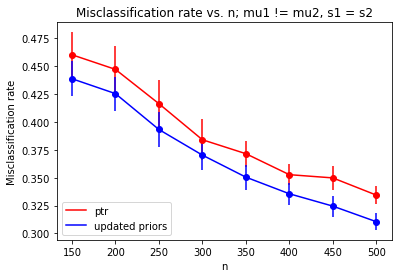

In [27]:
ptr_means = np.array([np.mean(i) for i in ptr_ecdf_ds])
up_means = np.array([np.mean(i) for i in up_ecdf_ds])

ptr_std = np.array([np.std(i, ddof = 1) for i in ptr_ecdf_ds])
up_std = np.array([np.std(i, ddof = 1) for i in up_ecdf_ds])

fig, ax = plt.subplots(1,1)

ax.plot(n, 1 - ptr_means, label = 'ptr', c = 'r')
ax.plot(n, 1 - up_means, label = 'updated priors', c = 'b')
ax.errorbar(n, 1 - ptr_means, yerr = 1.96*ptr_std/np.sqrt(it), fmt='o', c = 'r')
ax.errorbar(n, 1 - up_means, yerr = 1.96*up_std/np.sqrt(it), fmt='o', c = 'b')
ax.set_title('Misclassification rate vs. n; mu1 != mu2, s1 = s2')
ax.set_xlabel('n')
ax.set_ylabel('Misclassification rate')
ax.legend(loc = 'lower left')

plt.savefig('ds_ecdf.png')

In [6]:
n = [150, 200, 250, 300, 350, 400, 450, 500]
it = 100
seed_ratio = 0.1
pi1 = 0.5
pi2 = 1 - pi1
pis = np.array([pi1, pi2])
pi = pis

p = 0.52
q = 0.48

B = np.array([[p**2, p*q], [p*q, q**2]])

max_dim = 1

mu1 = 100
mu2 = 102
scale1 = 4
scale2 = 9

means = np.array([[mu1, mu2], [mu2, mu1]])
scales = np.array([[scale1, scale2], [scale2, scale1]])

ptr_ecdf_dd = [[] for i in range(len(n))]
up_ecdf_dd = [[] for i in range(len(n))]

for i in tqdm(range(len(n))):
    n1 = int(np.round(n[i]*seed_ratio*pi[0]))
    n2 = int(np.round(n[i]*seed_ratio*(1 - pi[0])))
    
    ns  = n1 + n2

    seeds1 = np.arange(0, n1)
    seeds2 = np.arange(int(np.round(n[i]*pi[0])), int(np.round(n[i]*pi[0])) + n2)
    all_seeds = np.concatenate((seeds1, seeds2))

    labels1 = np.zeros(len(seeds1))
    labels2 = np.ones(len(seeds2))
    seed_labels = np.concatenate((labels1, labels2))

    all_labels = np.concatenate((np.zeros(int(np.round(n[i]*pi[0]))), np.ones(int(np.round(n[i]*pi[1])))))
    
    for j in range(it):
        A = adj_matrix(n[i], pis, B, True, dist = "normal", means = means, scales = scales, acorn = j)
        
        A_ptr = pass_to_ranks(A)
        V_ptr, U_ptr = adj_spectral_embedding(A_ptr, max_dim = 2, acorn = j)
        X_hat = V_ptr[:, :1]
        ptr_class = gaussian_classification(X_hat, all_seeds, seed_labels)
        
        C = strip_weights(A)
        V_C, U_C = adj_spectral_embedding(C, max_dim = 2, acorn = j)
        X_hat_C = V_C[:, :1]
        
        up_class = updated_priors_classification(A, all_seeds, seed_labels, pis, max_dim = 1, method = "KS", X_hat = X_hat_C, acorn = j)
        
        ptr_ecdf_dd[i].append((np.sum(ptr_class == all_labels) - ns)/(n[i] - ns))
        up_ecdf_dd[i].append((np.sum(up_class == all_labels) - ns)/(n[i] - ns))

In [7]:
import _pickle as pickle
pickle.dump(up_ecdf_dd, open('up_ecdf_dd.pkl', 'wb'))
pickle.dump(ptr_ecdf_dd, open('ptr_ecdf_dd.pkl', 'wb'))

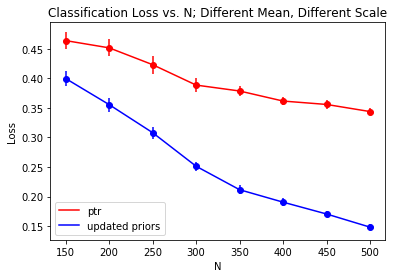

In [8]:
ptr_means = np.array([np.mean(i) for i in ptr_ecdf_dd])
up_means = np.array([np.mean(i) for i in up_ecdf_dd])

ptr_std = np.array([np.std(i, ddof = 1) for i in ptr_ecdf_dd])
up_std = np.array([np.std(i, ddof = 1) for i in up_ecdf_dd])

fig, ax = plt.subplots(1,1)

ax.plot(n, 1 - ptr_means, label = 'ptr', c = 'r')
ax.plot(n, 1 - up_means, label = 'updated priors', c = 'b')
ax.errorbar(n, 1 - ptr_means, yerr = 1.96*ptr_std/np.sqrt(it), fmt='o', c = 'r')
ax.errorbar(n, 1 - up_means, yerr = 1.96*up_std/np.sqrt(it), fmt='o', c = 'b')
ax.set_title('Misclassification rate vs. n; mu1 != mu2, s1 != s2')
ax.set_xlabel('n')
ax.set_ylabel('Misclassification rate')
ax.legend(loc = 'lower left')
#ax.set_ylim(0,1)

plt.savefig('dd_ecdf.png')

In [16]:
n = [150, 200, 250, 300, 350, 400, 450, 500]
it = 100
seed_ratio = 0.1
pi1 = 0.5
pi2 = 1 - pi1
pis = np.array([pi1, pi2])
pi = pis

p = 0.52
q = 0.48

B = np.array([[p**2, p*q], [p*q, q**2]])

max_dim = 1

mu1 = 100
mu2 = 100
scale1 = 9
scale2 = 9

means = np.array([[mu1, mu2], [mu2, mu1]])
scales = np.array([[scale1, scale2], [scale2, scale1]])

ptr_ecdf_ss = [[] for i in range(len(n))]
up_ecdf_ss = [[] for i in range(len(n))]

for i in tqdm(range(len(n))):
    n1 = int(np.round(n[i]*seed_ratio*pi[0]))
    n2 = int(np.round(n[i]*seed_ratio*(1 - pi[0])))
    
    ns  = n1 + n2

    seeds1 = np.arange(0, n1)
    seeds2 = np.arange(int(np.round(n[i]*pi[0])), int(np.round(n[i]*pi[0])) + n2)
    all_seeds = np.concatenate((seeds1, seeds2))

    labels1 = np.zeros(len(seeds1))
    labels2 = np.ones(len(seeds2))
    seed_labels = np.concatenate((labels1, labels2))

    all_labels = np.concatenate((np.zeros(int(np.round(n[i]*pi[0]))), np.ones(int(np.round(n[i]*pi[1])))))
    
    for j in range(it):
        A = adj_matrix(n[i], pis, B, True, dist = "normal", means = means, scales = scales, acorn = j)
        
        A_ptr = pass_to_ranks(A)
        V_ptr, U_ptr = adj_spectral_embedding(A_ptr, max_dim = 2, acorn = j)
        X_hat = V_ptr[:, :1]
        ptr_class = gaussian_classification(X_hat, all_seeds, seed_labels)
        
        C = strip_weights(A)
        V_C, U_C = adj_spectral_embedding(C, max_dim = 2, acorn = j)
        X_hat_C = V_C[:, :1]
        
        up_class = updated_priors_classification(X_hat_C, A, all_seeds, seed_labels,  method = "KS", acorn = j)
        
        ptr_ecdf_ss[i].append((np.sum(ptr_class == all_labels) - ns)/(n[i] - ns))
        up_ecdf_ss[i].append((np.sum(up_class == all_labels) - ns)/(n[i] - ns))

In [17]:
import _pickle as pickle
# pickle.dump(up_ecdf_ss, open('up_ecdf_ss.pkl', 'wb'))
# pickle.dump(ptr_ecdf_ss, open('ptr_ecdf_ss.pkl', 'wb'))
up_ecdf_ss = pickle.load(open('up_ecdf_ss.pkl', 'rb'))
ptr_ecdf_ss = pickle.load(open('ptr_ecdf_ss.pkl', 'rb'))

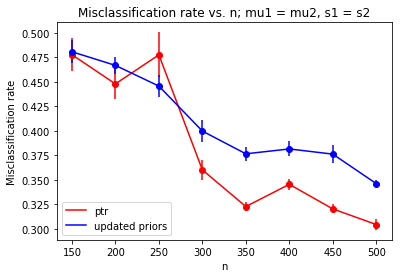

In [18]:
ptr_means = np.array([np.mean(i) for i in ptr_ecdf_ss])
up_means = np.array([np.mean(i) for i in up_ecdf_ss])

ptr_std = np.array([np.std(i, ddof = 1) for i in ptr_ecdf_ss])
up_std = np.array([np.std(i, ddof = 1) for i in up_ecdf_ss])

fig, ax = plt.subplots(1,1)

ax.plot(n, 1 - ptr_means, label = 'ptr', c = 'r')
ax.plot(n, 1 - up_means, label = 'updated priors', c = 'b')
ax.errorbar(n, 1 - ptr_means, yerr = 1.96*ptr_std/np.sqrt(it), fmt='o', c = 'r')
ax.errorbar(n, 1 - up_means, yerr = 1.96*up_std/np.sqrt(it), fmt='o', c = 'b')
ax.set_title('Misclassification rate vs. n; mu1 = mu2, s1 = s2')
ax.set_xlabel('n')
ax.set_ylabel('Misclassification rate')
ax.legend(loc = 'lower left')

plt.savefig('ss_ecdf.png')

In [12]:
n = [150, 200, 250, 300, 350, 400, 450, 500]
it = 100
seed_ratio = 0.1
pi1 = 0.5
pi2 = 1 - pi1
pis = np.array([pi1, pi2])
pi = pis

p = 0.52
q = 0.48

B = np.array([[p**2, p*q], [p*q, q**2]])

max_dim = 1

mu1 = 100
mu2 = 100
scale1 = 4
scale2 = 9

means = np.array([[mu1, mu2], [mu2, mu1]])
scales = np.array([[scale1, scale2], [scale2, scale1]])

ptr_ecdf_sd = [[] for i in range(len(n))]
up_ecdf_sd = [[] for i in range(len(n))]

for i in tqdm(range(len(n))):
    n1 = int(np.round(n[i]*seed_ratio*pi[0]))
    n2 = int(np.round(n[i]*seed_ratio*(1 - pi[0])))
    
    ns  = n1 + n2

    seeds1 = np.arange(0, n1)
    seeds2 = np.arange(int(np.round(n[i]*pi[0])), int(np.round(n[i]*pi[0])) + n2)
    all_seeds = np.concatenate((seeds1, seeds2))

    labels1 = np.zeros(len(seeds1))
    labels2 = np.ones(len(seeds2))
    seed_labels = np.concatenate((labels1, labels2))

    all_labels = np.concatenate((np.zeros(int(np.round(n[i]*pi[0]))), np.ones(int(np.round(n[i]*pi[1])))))
    
    for j in range(it):
        A = adj_matrix(n[i], pis, B, True, dist = "normal", means = means, scales = scales, acorn = j)
        
        A_ptr = pass_to_ranks(A)
        V_ptr, U_ptr = adj_spectral_embedding(A_ptr, max_dim = 2, acorn = j)
        X_hat = V_ptr[:, :1]
        ptr_class = gaussian_classification(X_hat, all_seeds, seed_labels)
        
        C = strip_weights(A)
        V_C, U_C = adj_spectral_embedding(C, max_dim = 2, acorn = j)
        X_hat_C = V_C[:, :1]
        
        up_class = updated_priors_classification(A, all_seeds, seed_labels, pis, max_dim = 1, method = "KS", X_hat = X_hat_C, acorn = j)
        
        ptr_ecdf_sd[i].append((np.sum(ptr_class == all_labels) - ns)/(n[i] - ns))
        up_ecdf_sd[i].append((np.sum(up_class == all_labels) - ns)/(n[i] - ns))

In [17]:
import _pickle as pickle
#pickle.dump(up_ecdf_sd, open('up_ecdf_sd.pkl', 'wb'))
#pickle.dump(ptr_ecdf_sd, open('ptr_ecdf_sd.pkl', 'wb'))
ptr_ecdf_sd = pickle.load(open('ptr_ecdf_sd.pkl', 'rb'))
up_ecdf_sd = pickle.load(open('up_ecdf_sd.pkl', 'rb'))

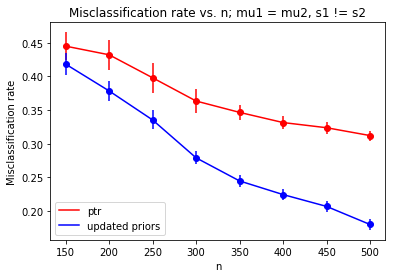

In [25]:
ptr_means = np.array([np.mean(i) for i in ptr_ecdf_sd])
up_means = np.array([np.mean(i) for i in up_ecdf_sd])

ptr_std = np.array([np.std(i, ddof = 1) for i in ptr_ecdf_sd])
up_std = np.array([np.std(i, ddof = 1) for i in up_ecdf_sd])

fig, ax = plt.subplots(1,1)

ax.plot(n, 1 - ptr_means, label = 'ptr', c = 'r')
ax.plot(n, 1 - up_means, label = 'updated priors', c = 'b')
ax.errorbar(n, 1 - ptr_means, yerr = 1.96*ptr_std/np.sqrt(it), fmt='o', c = 'r')
ax.errorbar(n, 1 - up_means, yerr = 1.96*up_std/np.sqrt(it), fmt='o', c = 'b')
ax.set_title('Misclassification rate vs. n; mu1 = mu2, s1 != s2')
ax.set_xlabel('n')
ax.set_ylabel('Misclassification rate')
ax.legend(loc = 'lower left')

plt.savefig('sd_ecdf.png')